In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

# 데이터 디렉토리 경로
train_data_dir = './drive/MyDrive/Colab Notebooks/contest/data/train'

# 각 폴더의 파일 목록을 반복하면서 작업
folds = os.listdir(train_data_dir)

# 데이터 파일 경로와 레이블을 저장할 리스트 생성
filepaths = []
labels = []


for fold in folds:
    if fold == '.DS_Store':
        continue  # ".DS_Store" 파일인 경우 건너뜁니다.

    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        # 파일에 대한 작업을 수행합니다.
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)

print(train_df.head())

                                           filepaths          labels
0  ./drive/MyDrive/Colab Notebooks/contest/data/t...  Osteoarthritis
1  ./drive/MyDrive/Colab Notebooks/contest/data/t...  Osteoarthritis
2  ./drive/MyDrive/Colab Notebooks/contest/data/t...  Osteoarthritis
3  ./drive/MyDrive/Colab Notebooks/contest/data/t...  Osteoarthritis
4  ./drive/MyDrive/Colab Notebooks/contest/data/t...  Osteoarthritis


In [ ]:
# Generate data paths with labels
test_data_dir = './drive/MyDrive/Colab Notebooks/contest/data/test'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    if fold == '.DS_Store':
        continue  # ".DS_Store" 파일인 경우 건너뜁니다.
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
train_df

,filepaths,labels
0,./drive/MyDrive/Colab Notebooks/contest/data/t...,Osteoarthritis
1,./drive/MyDrive/Colab Notebooks/contest/data/t...,Osteoarthritis
2,./drive/MyDrive/Colab Notebooks/contest/data/t...,Osteoarthritis
3,./drive/MyDrive/Colab Notebooks/contest/data/t...,Osteoarthritis
4,./drive/MyDrive/Colab Notebooks/contest/data/t...,Osteoarthritis
...,...,...
7753,./drive/MyDrive/Colab Notebooks/contest/data/t...,NoPneumonia
7754,./drive/MyDrive/Colab Notebooks/contest/data/t...,NoPneumonia
7755,./drive/MyDrive/Colab Notebooks/contest/data/t...,NoPneumonia
7756,./drive/MyDrive/Colab Notebooks/contest/data/t...,NoPneumonia


In [ ]:
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [ ]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255,     # 픽셀 값을 0~1 범위로 변환
#    rotation_range=15,  # 15도까지 회전
#    zoom_range=0.2,      # 20%까지 확대
#    horizontal_flip = True    # 20%까지 확대
)

ts_gen = ImageDataGenerator(rescale=1./255)

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 7758 validated image filenames belonging to 4 classes.
Found 483 validated image filenames belonging to 4 classes.
Found 484 validated image filenames belonging to 4 classes.


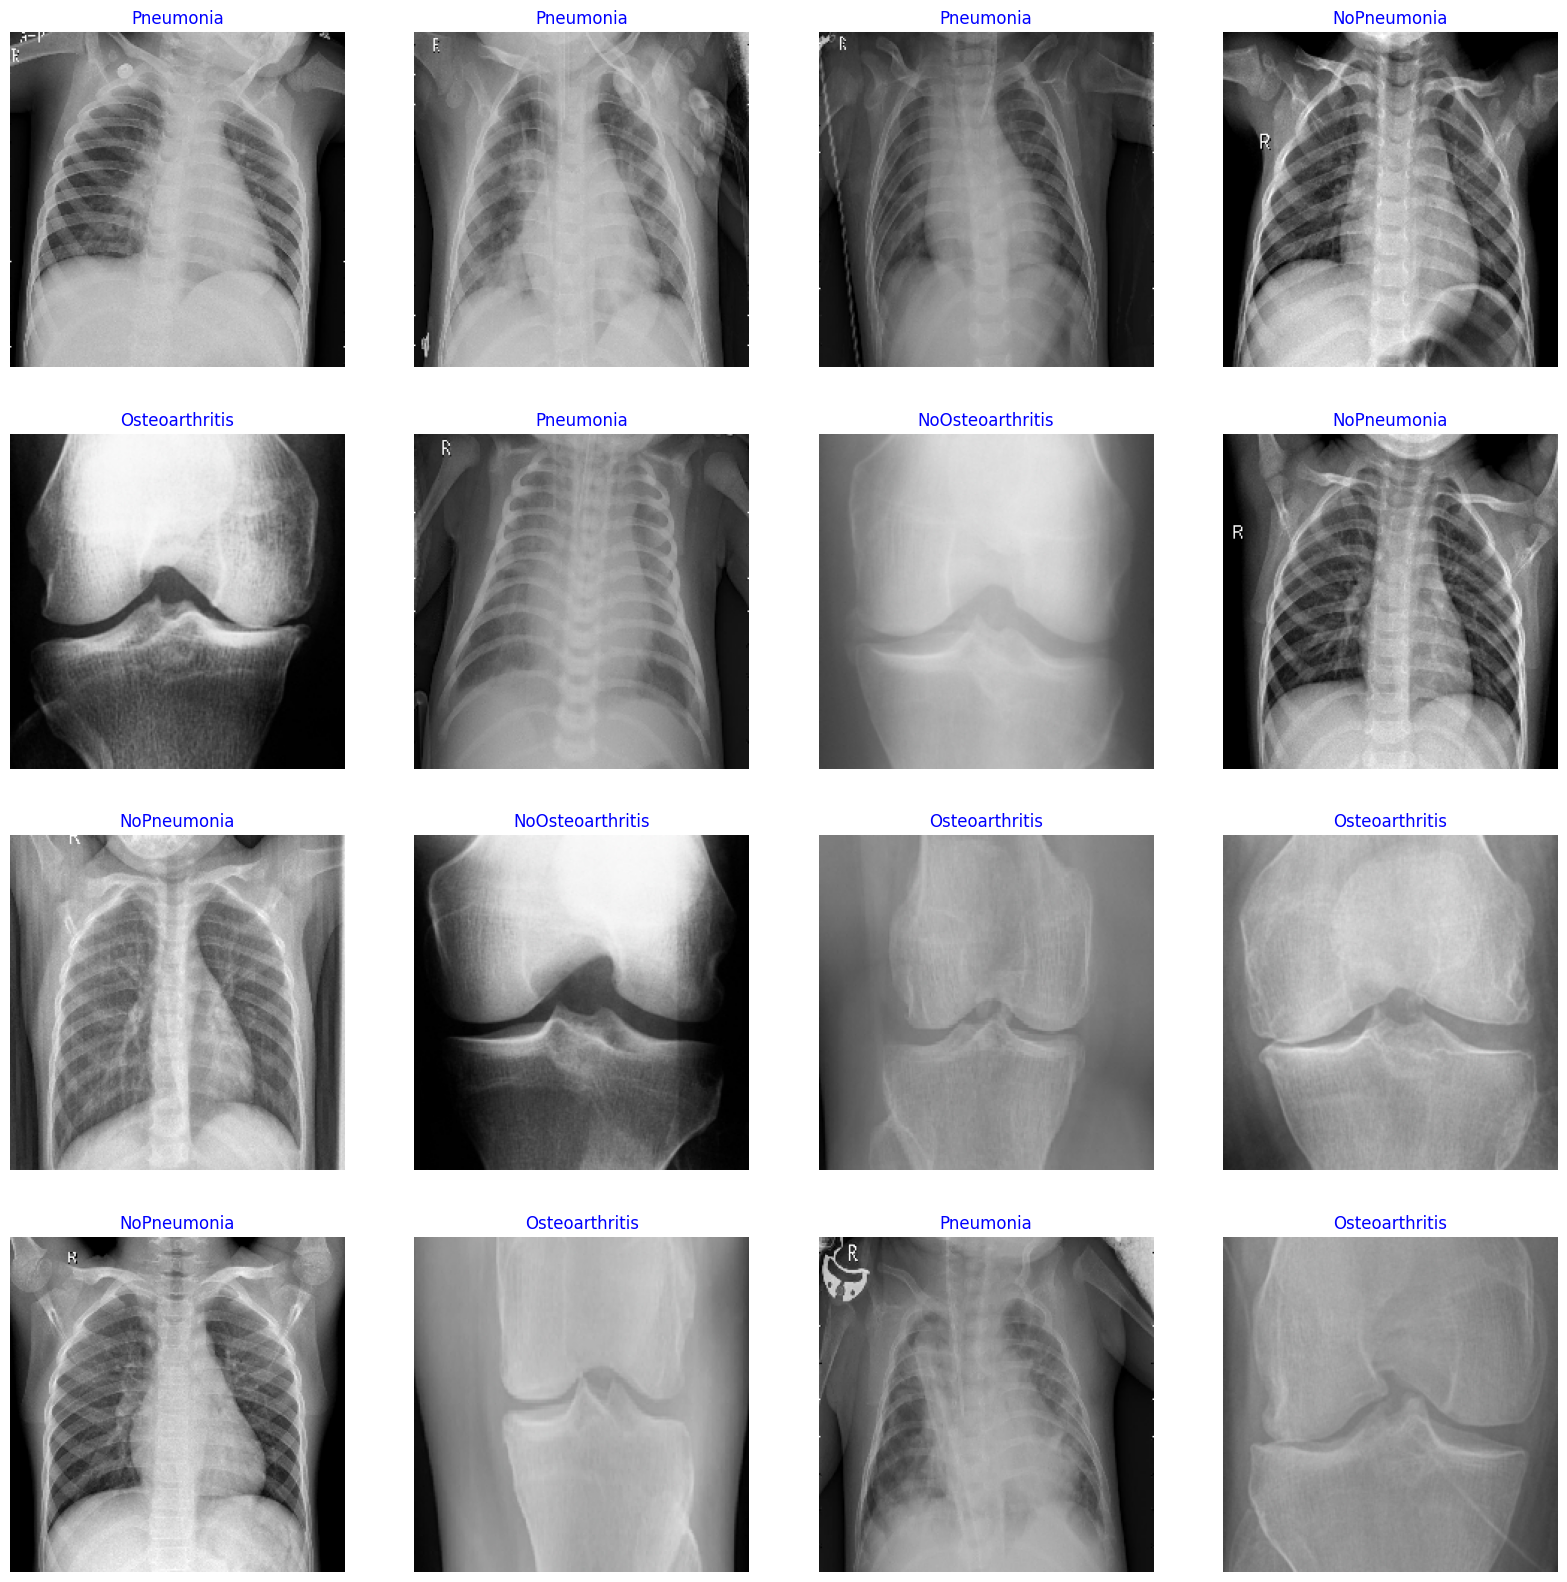

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i]       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
#    image = images[i] / 255       # scales data to range (0 - 255)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision

# ResNet-50 모델 불러오기 (사전 훈련된 가중치 포함)
resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 새로운 모델 생성하기
model = Sequential([
    resnet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')  # 분류할 클래스 수에 맞게 조정
])

# ResNet-50의 Convolutional 층들은 동결
resnet_model.trainable = False

model.compile (Adamax(learning_rate=0.001),loss='categorical_crossentropy', metrics=["accuracy",Recall(), Precision()])
model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 49256196 (187.90 MB)
Trainable params: 25691396 (98.00 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
epochs = 10  # number of all epochs in training

history = model.fit(train_gen , epochs= epochs ,validation_data= valid_gen)

Epoch 1/10
485/485 [==============================] - 1800s 4s/step - loss: 1.1300 - accuracy: 0.8706 - recall: 0.8705 - precision: 0.8709 - val_loss: 0.4976 - val_accuracy: 0.8778 - val_recall: 0.8778 - val_precision: 0.8778
Epoch 2/10
485/485 [==============================] - 85s 175ms/step - loss: 0.1711 - accuracy: 0.9450 - recall: 0.9450 - precision: 0.9450 - val_loss: 0.4465 - val_accuracy: 0.8882 - val_recall: 0.8882 - val_precision: 0.8882
Epoch 3/10
485/485 [==============================] - 83s 172ms/step - loss: 0.1004 - accuracy: 0.9643 - recall: 0.9643 - precision: 0.9643 - val_loss: 0.4077 - val_accuracy: 0.9006 - val_recall: 0.9006 - val_precision: 0.9006
Epoch 4/10
485/485 [==============================] - 83s 171ms/step - loss: 0.0626 - accuracy: 0.9780 - recall: 0.9780 - precision: 0.9780 - val_loss: 0.3749 - val_accuracy: 0.9255 - val_recall: 0.9255 - val_precision: 0.9255
Epoch 5/10
485/485 [==============================] - 82s 169ms/step - loss: 0.0545 - accurac

In [ ]:
from keras.callbacks import ModelCheckpoint

check_point_va = ModelCheckpoint(filepath='data_r/bin/resnet50v2-vaB_class4.h5',
                              monitor='val_acc')
check_point_a = ModelCheckpoint(filepath='data_r/bin/resnet50v2-aB_class4.h5',
                              monitor='acc')
check_point_r = ModelCheckpoint(filepath='data_r/bin/resnet50v2-aB_class4.h5',
                              monitor='val_recall')
check_point_p = ModelCheckpoint(filepath='data_r/bin/resnet50v2-aB_class4.h5',
                              monitor='val_precision')
# Fine-tuning을 위해 ResNet-50의 일부 층들의 동결을 해제
resnet_model.trainable = True

# 모델 다시 컴파일 (학습률을 조정할 필요가 있을 수 있음)
model.compile (Adamax(learning_rate=0.0001),loss='categorical_crossentropy', metrics=["accuracy",Recall(), Precision()])

# Fine-tuning
history2 = model.fit_generator(train_gen,

                              epochs=5,
                              validation_data=valid_gen,
                              callbacks=[check_point_va,check_point_a,check_point_r,check_point_p]
#                               use_multiprocessing=True,
#                              class_weight=class_weights
                              )

Epoch 1/5
485/485 [==============================] - 149s 253ms/step - loss: 0.2786 - accuracy: 0.9027 - recall_1: 0.9019 - precision_1: 0.9030 - val_loss: 0.2732 - val_accuracy: 0.9048 - val_recall_1: 0.9027 - val_precision_1: 0.9046
Epoch 2/5
485/485 [==============================] - 129s 265ms/step - loss: 0.0863 - accuracy: 0.9691 - recall_1: 0.9685 - precision_1: 0.9693 - val_loss: 0.3793 - val_accuracy: 0.9068 - val_recall_1: 0.9068 - val_precision_1: 0.9068
Epoch 3/5
485/485 [==============================] - 125s 258ms/step - loss: 0.0431 - accuracy: 0.9861 - recall_1: 0.9861 - precision_1: 0.9861 - val_loss: 0.4123 - val_accuracy: 0.9089 - val_recall_1: 0.9089 - val_precision_1: 0.9089
Epoch 4/5
485/485 [==============================] - 116s 239ms/step - loss: 0.0412 - accuracy: 0.9857 - recall_1: 0.9857 - precision_1: 0.9857 - val_loss: 0.3526 - val_accuracy: 0.9255 - val_recall_1: 0.9255 - val_precision_1: 0.9255
Epoch 5/5
485/485 [==============================] - 120s 24

In [ ]:
# 아래 3 단락 코드는 위에 코드를 따로 짜서 하느라
# pickle을 생성하는 코드가 빠트려 따로 추가하느라
# 생겨난 파트입니다!

BASE_PATH='./drive/MyDrive/Colab Notebooks/contest/data/'
model.save(BASE_PATH+'bin/MySelf.h5')
model.save(BASE_PATH+'bin/MySelf.tf')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(BASE_PATH + 'test/',
                                            target_size=(224, 224),
                                            batch_size=16,
                                            shuffle=False,
                                            class_mode='categorical',
                                            color_mode= 'rgb')

Found 967 images belonging to 4 classes.


In [ ]:
import pickle

# key 와 value 값을 바꾸어 줍니다.
class4 = dict()
for key,value in test_set.class_indices.items():
    class4[value] = key

with open(BASE_PATH+'bin/class4.pickle', 'wb') as f:
    pickle.dump(class4, f)

In [ ]:
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']

# val_acc = history.history['val_accuracy']
# val_loss = history.history['val_loss']

# index_loss = np.argmin(val_loss)
# val_lowest = val_loss[index_loss]

# index_acc = np.argmax(val_acc)
# val_highest = val_acc[index_acc]

# Epochs = [i+1 for i in range(len(train_acc))]

# loss_label = f'Best epochs = {str(index_loss +1)}'
# acc_label = f'Best epochs = {str(index_acc + 1)}'

# plt.figure(figsize= (20,8))
# plt.style.use('fivethirtyeight')

# plt.subplot(1,2,1)
# plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
# plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
# plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
# plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
# plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.tight_layout
# plt.show();

In [ ]:
#train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
# print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 71s 5s/step - loss: 0.2391 - accuracy: 0.9336 - recall_1: 0.9336 - precision_1: 0.9336
Validation Loss:  0.4058515429496765
Validation Accuracy:  0.92578125
--------------------
Test Loss:  0.23914887011051178
Test Accuracy:  0.93359375


In [ ]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

31/31 [==============================] - 69s 2s/step


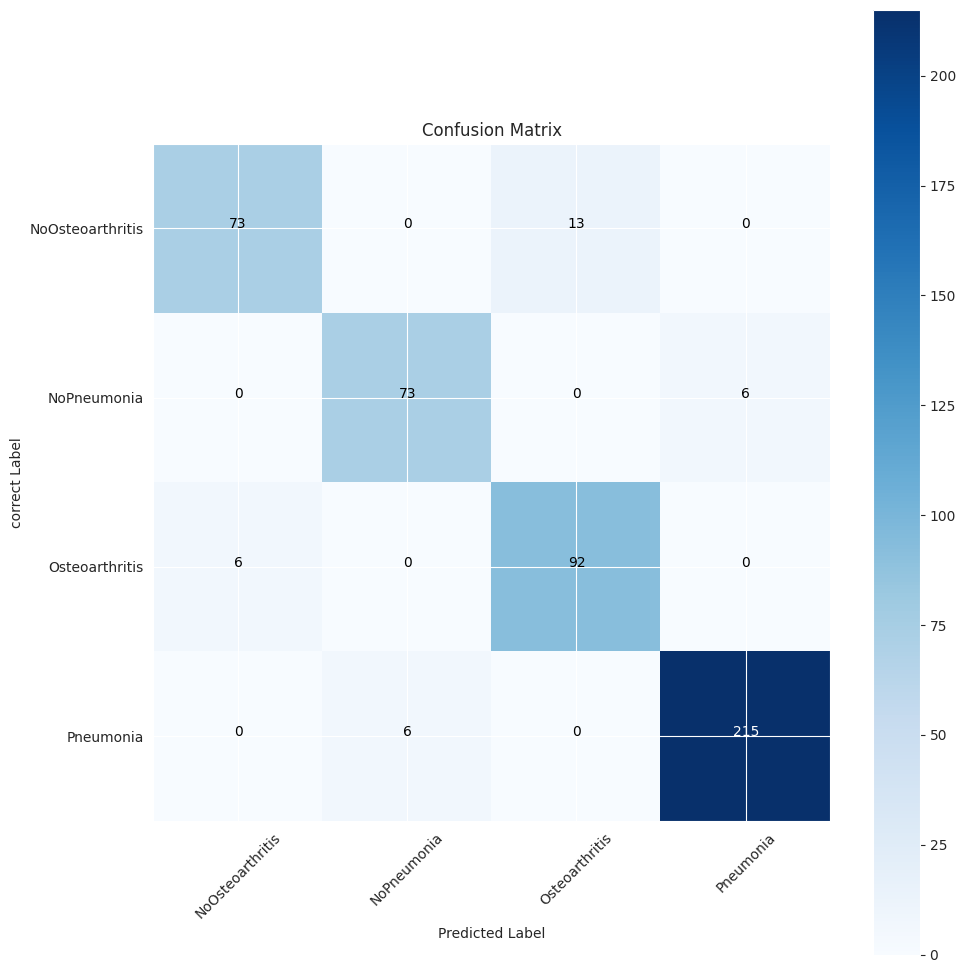

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('correct Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

                  precision    recall  f1-score   support

NoOsteoarthritis       0.86      0.93      0.89        86
     NoPneumonia       0.96      0.96      0.96        79
  Osteoarthritis       0.93      0.87      0.90        98
       Pneumonia       0.99      0.99      0.99       221

        accuracy                           0.95       484
       macro avg       0.94      0.94      0.94       484
    weighted avg       0.95      0.95      0.95       484

